In [4]:
import pandas as pd
import numpy as np

In [100]:
#Generer des données

import random

def generer_donnees_clients(nombre_clients=1000):
    """Génère une base de données de clients bancaires."""
   
    identifiants = range(1, nombre_clients + 1)
    ages = np.random.randint(18, 75, nombre_clients)  # Âge entre 18 et 74 ans
    chomage = np.random.choice(['Oui', 'Non'], nombre_clients)
    revenus = np.random.randint(10000, 150000, nombre_clients)  # Revenu annuel entre 10 000 et 150 000
    jours_delinquance = np.random.randint(0, 365, nombre_clients)  # Jours de délinquance entre 0 et 364
    niveaux_instruction = np.random.choice(['Non instruit', 'Primaire', 'Secondaire', 'Universitaire'], nombre_clients)
    defaut = np.random.choice([0, 1], nombre_clients)

    data = {
        'Identifiant': identifiants,
        'Âge': ages,
        'Chômage': chomage,
        'Revenu': revenus,
        'Jours de délinquance': jours_delinquance,
        'Niveau d\'instruction': niveaux_instruction,
        'Défaut': defaut
    }

    df = pd.DataFrame(data)
    return df

# Générer les données
df_clients = generer_donnees_clients()
df_clients
# Enregistrer dans un fichier csv
#df_clients.to_csv('clients_banque.csv', index=False)

#print("Le fichier clients_banque.csv a été généré avec succès.")


,Identifiant,Âge,Chômage,Revenu,Jours de délinquance,Niveau d'instruction,Défaut
0,1,63,Non,121437,64,Universitaire,0
1,2,24,Non,144977,299,Secondaire,0
2,3,37,Non,17434,175,Universitaire,1
3,4,69,Oui,130361,177,Primaire,0
4,5,63,Non,106433,337,Secondaire,0
...,...,...,...,...,...,...,...
995,996,18,Non,30750,13,Non instruit,1
996,997,52,Non,32218,255,Primaire,1
997,998,50,Non,26077,149,Non instruit,1
998,999,41,Oui,59441,124,Non instruit,0


In [101]:
Data=df_clients
Data.dtypes

Identifiant              int64
Âge                      int32
Chômage                 object
Revenu                   int32
Jours de délinquance     int32
Niveau d'instruction    object
Défaut                   int32
dtype: object

In [102]:
# La statistque descriptive
Data.describe(include="all")

,Identifiant,Âge,Chômage,Revenu,Jours de délinquance,Niveau d'instruction,Défaut
count,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000,1000.00000
unique,NaN,NaN,2,NaN,NaN,4,NaN
top,NaN,NaN,Non,NaN,NaN,Non instruit,NaN
freq,NaN,NaN,509,NaN,NaN,267,NaN
mean,500.500000,45.760000,NaN,80765.307000,180.414000,NaN,0.49000
std,288.819436,16.580087,NaN,41443.195019,105.584851,NaN,0.50015
min,1.000000,18.000000,NaN,10094.000000,0.000000,NaN,0.00000
25%,250.750000,31.000000,NaN,43491.500000,89.000000,NaN,0.00000
50%,500.500000,46.000000,NaN,82146.500000,182.000000,NaN,0.00000
75%,750.250000,60.000000,NaN,116365.000000,272.000000,NaN,1.00000


In [103]:
Data.isnull().count()

Identifiant             1000
Âge                     1000
Chômage                 1000
Revenu                  1000
Jours de délinquance    1000
Niveau d'instruction    1000
Défaut                  1000
dtype: int64

In [104]:
# Analyse fondamentale des variables 

# Âge du client           +
# Chômage                 -
# Revenu                  +
# Jours de délinquance    -
# Niveau d'instruction    +

In [105]:
Data['Revenu']= np.log(Data['Revenu'])

In [106]:
## Recoder les variables categorielles en dummies
# parametrage des variables

df = Data.drop('Identifiant', axis=1)

df= pd.get_dummies(df, columns=["Niveau d'instruction","Chômage"], prefix="Instr", drop_first=True)

In [107]:
df

,Âge,Revenu,Jours de délinquance,Défaut,Instr_Primaire,Instr_Secondaire,Instr_Universitaire,Instr_Oui
0,63,11.707151,64,0,False,False,True,False
1,24,11.884330,299,0,False,True,False,False
2,37,9.766178,175,1,False,False,True,False
3,69,11.778063,177,0,True,False,False,True
4,63,11.575271,337,0,False,True,False,False
...,...,...,...,...,...,...,...,...
995,18,10.333645,13,1,False,False,False,False
996,52,10.380281,255,1,True,False,False,False
997,50,10.168809,149,1,False,False,False,False
998,41,10.992740,124,0,False,False,False,True


In [108]:
from lifelines import CoxPHFitter

In [109]:
# Initialiser et ajuster le modèle de Cox

# Créer l'objet CoxPHFitter
cph = CoxPHFitter()

# Ajuster le modèle avec les variables spécifiées
cph.fit(df, duration_col="Jours de délinquance", event_col='Défaut')

<lifelines.CoxPHFitter: fitted with 1000 total observations, 510 right-censored observations>

In [110]:
# Afficher les résultats
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1000 total observations, 510 right-censored observations>
             duration col = 'Jours de délinquance'
                event col = 'Défaut'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 490
   partial log-likelihood = -2925.81
         time fit was run = 2025-02-26 00:44:46 UTC

---
                     coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                            
Âge                 -0.00      1.00      0.00           -0.01            0.00                0.99                1.00
Revenu               0.01      1.01      0.07           -0.12            0.14                0.89                1.16
Instr_Primaire       0.06      1.06      0.13           -0.19            0.31                0.83                1.36
Instr_Secondaire    -0.16      0.85      0.13           -0.41            0.09                0.66                1.10
Instr_Universitaire -0.20      0.82      0.13           -0.45            0.05                0.64                1.05
Instr_Oui            0.02      1.02      0.09           -0.16            0.20                0.85                1.22

                     cmp to     z    p  -log2(p)
covariate                                       
Âge                    0.00 -0.29 0.78      0.37
Revenu                 0.00  0.22 0.83      0.27
Instr_Primaire         0.00  0.46 0.64      0.64
Instr_Secondaire       0.00 -1.22 0.22      2.17
Instr_Universitaire    0.00 -1.56 0.12      3.08
Instr_Oui              0.00  0.20 0.85      0.24
---
Concordance = 0.54
Partial AIC = 5863.62
log-likelihood ratio test = 5.41 on 6 df
-log2(p) of ll-ratio test = 1.02

### Modelisation avec weibull, lognormal et loglogistic

In [111]:
from lifelines import WeibullFitter, LogNormalFitter, LogLogisticFitter

In [112]:
df.dtypes

Âge                       int32
Revenu                  float64
Jours de délinquance      int32
Défaut                    int32
Instr_Primaire             bool
Instr_Secondaire           bool
Instr_Universitaire        bool
Instr_Oui                  bool
dtype: object

In [123]:
df

,Âge,Revenu,Jours de délinquance,Défaut,Instr_Primaire,Instr_Secondaire,Instr_Universitaire,Instr_Oui
0,63,11.707151,64,0,False,False,True,False
1,24,11.884330,299,0,False,True,False,False
2,37,9.766178,175,1,False,False,True,False
3,69,11.778063,177,0,True,False,False,True
4,63,11.575271,337,0,False,True,False,False
...,...,...,...,...,...,...,...,...
995,18,10.333645,13,1,False,False,False,False
996,52,10.380281,255,1,True,False,False,False
997,50,10.168809,149,1,False,False,False,False
998,41,10.992740,124,0,False,False,False,True


In [137]:
# Choisir la distribution (Weibull, LogNormal, LogLogistic)
distribution = 'weibull'  # Vous pouvez changer pour 'lognormal' ou 'loglogistic'

# Ajuster le modèle en fonction de la distribution choisie
if distribution == 'weibull':
    lrf = WeibullFitter()

# Ajouter une petite valeur positive aux valeurs nulles dans 'Jours_delinquance'
df['Jours de délinquance'] = df['Jours de délinquance'].apply(lambda x: 0.001 if x == 0 else x)

lrf.fit(df['Jours de délinquance'], event_observed=df['Défaut'])


<lifelines.WeibullFitter:"Weibull_estimate", fitted with 1000 total observations, 510 right-censored observations>

In [138]:
# Afficher les résultats
lrf.print_summary()

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 1000 total observations, 510 right-censored observations>
   number of observations = 1000
number of events observed = 490
           log-likelihood = -3353.04
               hypothesis = lambda_ != 1, rho_ != 1

---
          coef  se(coef)  coef lower 95%  coef upper 95%
lambda_ 322.16     11.07          300.47          343.85
rho_      1.40      0.05            1.29            1.50

         cmp to     z      p  -log2(p)
lambda_    1.00 29.02 <0.005    612.54
rho_       1.00  7.29 <0.005     41.51
---
AIC = 6710.08

<Axes: >

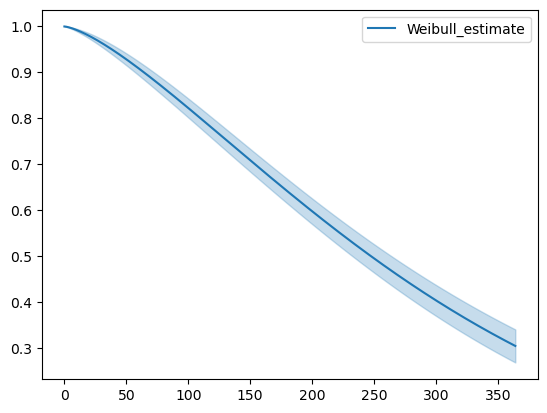

In [139]:
# Visualiser les courbes de survie obtenu de weibull
lrf.plot_survival_function()

In [140]:
# Choisir la distribution (Weibull, LogNormal, LogLogistic)
distribution = 'lognormal'  # Vous pouvez changer pour 'lognormal' ou 'loglogistic'

# Ajuster le modèle en fonction de la distribution choisie
if distribution == 'lognormal':
    lrf = LogNormalFitter()

# Ajouter une petite valeur positive aux valeurs nulles dans 'Jours_delinquance'
df['Jours de délinquance'] = df['Jours de délinquance'].apply(lambda x: 0.001 if x == 0 else x)

lrf.fit(df['Jours de délinquance'], event_observed=df['Défaut'])



<lifelines.LogNormalFitter:"LogNormal_estimate", fitted with 1000 total observations, 510 right-censored observations>

In [136]:
# Afficher les résultats
lrf.print_summary()

<lifelines.LogNormalFitter:"LogNormal_estimate", fitted with 1000 total observations, 510 right-censored observations>
   number of observations = 1000
number of events observed = 490
           log-likelihood = -3517.91
               hypothesis = mu_ != 0, sigma_ != 1

---
        coef  se(coef)  coef lower 95%  coef upper 95%
mu_     5.69      0.06            5.57            5.82
sigma_  1.58      0.05            1.47            1.68

        cmp to     z      p  -log2(p)
mu_       0.00 90.68 <0.005       inf
sigma_    1.00 11.17 <0.005     93.86
---
AIC = 7039.82

<Axes: >

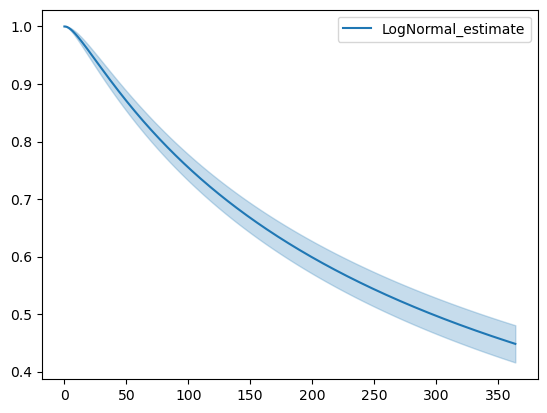

In [141]:
# Visualiser les courbes de survie obtenu de lognormal
lrf.plot_survival_function()

In [142]:
# Choisir la distribution (Weibull, LogNormal, LogLogistic)
distribution = 'loglogistic'  # Vous pouvez changer pour 'lognormal' ou 'loglogistic'

# Ajuster le modèle en fonction de la distribution choisie
if distribution == 'loglogistic':
    lrf = LogLogisticFitter()    
    
# Ajouter une petite valeur positive aux valeurs nulles dans 'Jours_delinquance'
df['Jours de délinquance'] = df['Jours de délinquance'].apply(lambda x: 0.001 if x == 0 else x)


lrf.fit(df['Jours de délinquance'], event_observed=df['Défaut'])

<lifelines.LogLogisticFitter:"LogLogistic_estimate", fitted with 1000 total observations, 510 right-censored observations>

In [143]:
# Afficher les résultats
lrf.print_summary()

<lifelines.LogLogisticFitter:"LogLogistic_estimate", fitted with 1000 total observations, 510 right-censored observations>
   number of observations = 1000
number of events observed = 490
           log-likelihood = -3396.87
               hypothesis = alpha_ != 1, beta_ != 1

---
         coef  se(coef)  coef lower 95%  coef upper 95%
alpha_ 263.56     10.65          242.68          284.43
beta_    1.56      0.06            1.44            1.68

        cmp to     z      p  -log2(p)
alpha_    1.00 24.66 <0.005    443.49
beta_     1.00  9.27 <0.005     65.49
---
AIC = 6797.74

<Axes: >

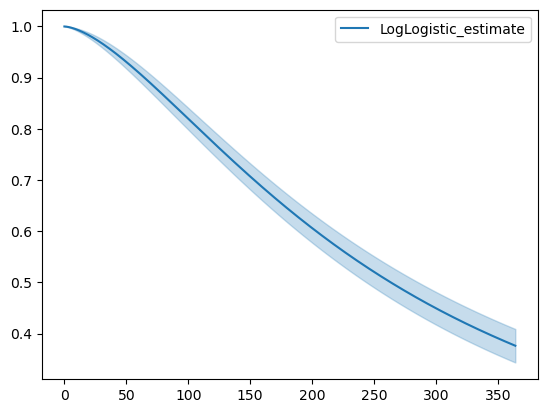

In [144]:
# Visualiser les courbes de survie (facultatif)
lrf.plot_survival_function()